In [15]:
from dolfin import *
from matplotlib import pyplot as plt
from ufl import nabla_div
%matplotlib notebook

# Scaled variables
L = 1; W = 0.2
mu = 1
rho = 1
delta = W/L
gamma = 0.4*delta**2
beta = 1.25
lambda_ = beta
g = gamma

# Create mesh and define function space
mesh = BoxMesh(Point(0, 0, 0), Point(L, W, W), 10, 10, 10)
V = VectorFunctionSpace(mesh, 'P', 1)

In [16]:
# Define boundary condition
tol = 1e-14

def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol

bc = DirichletBC(V, Constant((0, 0, 0)), clamped_boundary)

# Define strain & stress
def epsilon(u):
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    # return sym(nabla_grad(u))
    
def sigma(u):
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)

# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension() # space dimension
v = TestFunction(V)
f = Constant((0, 0, -rho*g))
T = Constant((0, 0, 0))
a = inner(sigma(u), epsilon(v))*dx
L = dot(f, v)*dx + dot(T, v)*ds

In [17]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

<IPython.core.display.Javascript object>


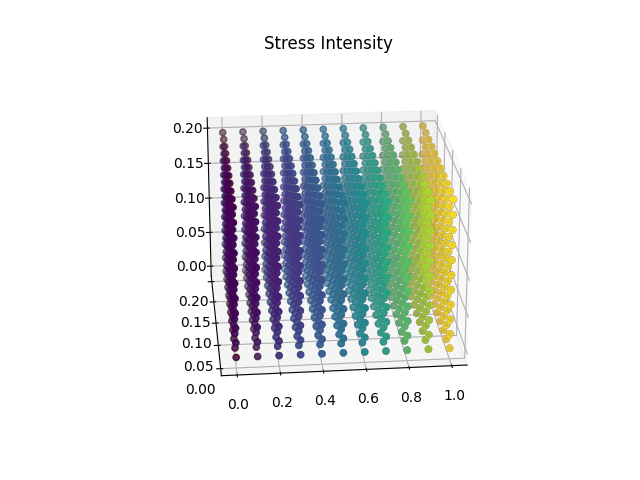

min/max u: 6.862664792741459e-07 0.18209354778671263


In [18]:
# Plot solution
plot(u, title='Displacement', mode='Displacement')

# Plot stress
s = sigma(u) - (1./3)*tr(sigma(u))*Identity(d) # deviatoric stress
von_Mises = sqrt(3./2*inner(s, s))
V = FunctionSpace(mesh, 'P', 1)
von_Mises = project(von_Mises, V)
plot(von_Mises, title='Stress Intensity')

# Compute magnitude of displacement
u_magnitude = sqrt(dot(u, u))
u_magnitude = project(u_magnitude, V)
plot(u_magnitude, 'Displacement Magnitude')
print('min/max u:',
     u_magnitude.vector().get_local().min(),
     u_magnitude.vector().get_local().max())